<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Plotting-Standards" data-toc-modified-id="Plotting-Standards-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting Standards</a></span><ul class="toc-item"><li><span><a href="#Bar-Plot" data-toc-modified-id="Bar-Plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bar Plot</a></span></li><li><span><a href="#Semi-Pie-Plot" data-toc-modified-id="Semi-Pie-Plot-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Semi Pie Plot</a></span></li><li><span><a href="#Pie-Plot" data-toc-modified-id="Pie-Plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pie Plot</a></span></li><li><span><a href="#Comparative-Line-Plot" data-toc-modified-id="Comparative-Line-Plot-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Comparative Line Plot</a></span></li><li><span><a href="#Disproportionality-Bar-Plot" data-toc-modified-id="Disproportionality-Bar-Plot-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Disproportionality Bar Plot</a></span></li></ul></li><li><span><a href="#Political-Science-Specific" data-toc-modified-id="Political-Science-Specific-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Political Science Specific</a></span><ul class="toc-item"><li><span><a href="#Parliament-Plot" data-toc-modified-id="Parliament-Plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Parliament Plot</a></span></li></ul></li></ul></div>

**Visualization**

This notebook provides examples for most functions found in [stdviz/plot](https://github.com/andrewtavis/stdviz/tree/main/stdviz/plot).

The setting is a hypothetical election in Germany for the Bundestag (German national parliament).

In [1]:
import pandas as pd

import stdviz
from stdviz import utils
from poli_sci_kit import utils as psk_utils
from poli_sci_kit import appointment

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D # for legend handles
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

# Data

We're using German political parties for this example. The following are their abbreviations and colors:

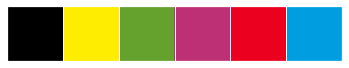

In [2]:
# Goal is to eventually be able to query these directly from Wikidata given a location
parties = ['CDU/CSU', 'FDP', 'Greens', 'Die Linke', 'SPD', 'AfD']
party_colors = ['#000000', '#ffed00', '#64a12d', '#be3075', '#eb001f', '#009ee0']
sns.palplot(sns.color_palette(party_colors))

Assume that Germany had an election that lead to the following Bundestag allocations:

In [3]:
allocations = [26, 9, 37, 12, 23, 5]

# Plotting Standards

## Bar Plot

Combines techniques from pandas and seaborn.

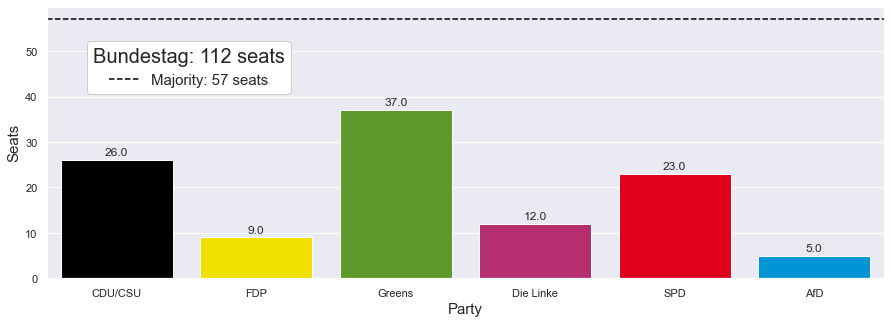

In [4]:
ax = stdviz.plot.bar(counts=allocations, names=parties, 
                     faction_names=None, colors=party_colors, 
                     horizontal=False, stacked=False, 
                     label_bars=True, axis=None)

# Initialize empty handles and labels
handles, labels = stdviz.plot.legend.gen_elements()

# Add a majority line
ax.axhline(int(sum(allocations)/2)+1, ls='--', color='black')
handles.insert(0, Line2D([0], [0], linestyle='--', color='black'))
labels.insert(0, 'Majority: {} seats'.format(int(sum(allocations)/2)+1))

ax.legend(handles=handles, labels=labels,
          title='Bundestag: {} seats'.format(sum(allocations)), 
          bbox_to_anchor=(0.3, 0.9),
          title_fontsize=20, fontsize=15, 
          ncol=2, loc='best', 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.set_ylabel('Seats', fontsize=15)
ax.set_xlabel('Party', fontsize=15)

plt.show()

Now say we want to make government factions and plot them:

In [5]:
factions = [[3,5,1,0], [4,2]]
factioned_allocations = psk_utils.gen_faction_groups(original_list=allocations, 
                                                     factions_indexes=factions)
factioned_allocations

[[12, 5, 9, 26], [23, 37]]

We need flat and ordered versions of the above for the labels:

In [6]:
flat_allocations= [item for sublist in factioned_allocations for item in sublist]
flat_allocations

[12, 5, 9, 26, 23, 37]

In [7]:
flat_factions = [item for sublist in factions for item in sublist]

parties_by_faction = [parties[i] for i in flat_factions]
parties_by_faction

['Die Linke', 'AfD', 'FDP', 'CDU/CSU', 'SPD', 'Greens']

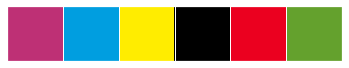

In [8]:
colors_by_faction = [party_colors[i] for i in flat_factions]
sns.palplot(sns.color_palette(colors_by_faction))

In [9]:
faction_names = ['Opposition', 'Government']

Let's combine all of the above for a horizontal stacked bar plot, which is as simple as changing the corresponding boolean arguments:

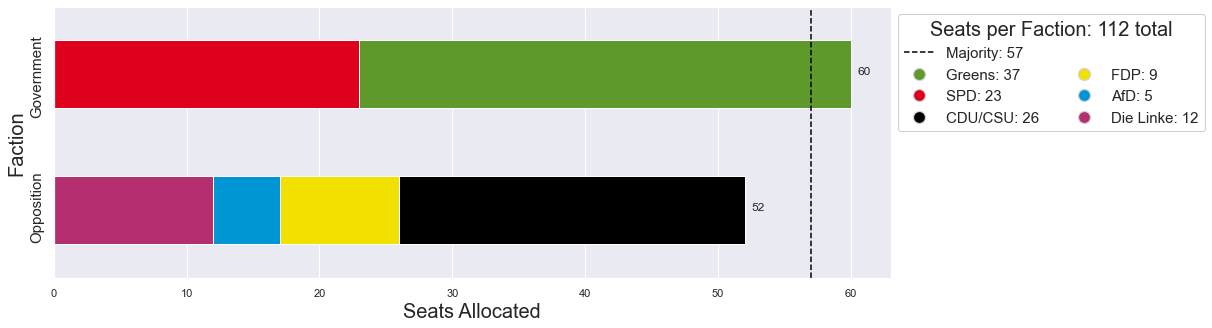

In [10]:
ax = stdviz.plot.bar(counts=factioned_allocations, names=parties_by_faction, 
                        faction_names=faction_names, colors=colors_by_faction, 
                        horizontal=True, stacked=True, label_bars=True,
                        axis=None)

handles, labels = stdviz.plot.legend.gen_elements(counts=allocations, names=parties, colors=party_colors, 
                                                size=12, marker='o', padding_indexes=[3],
                                                order=[2,4,0,1,5,3])

# Add a majority line
ax.axvline(int(sum(flat_allocations)/2)+1, ls='--', color='black')
handles.insert(0, Line2D([0], [0], linestyle='--', color='black'))
labels.insert(0, 'Majority: {}'.format(int(sum(flat_allocations)/2)+1))

# Reset shifted ticks
ax.set_yticks([0.25, 1.25])
ax.set_yticklabels(faction_names, fontsize=15)

leg = ax.legend(handles=handles, labels=labels,
                title='Seats per Faction: {} total'.format(sum(flat_allocations)), 
                bbox_to_anchor=(1, 1),
                title_fontsize=20, fontsize=15, 
                ncol=2, loc='best', 
                frameon=True, facecolor='#ffffff', framealpha=1)

ax.set_ylabel('Faction', fontsize=20)
ax.set_xlabel('Seats Allocated', fontsize=20)

plt.show()

## Semi Pie Plot

Uses matplotlib artists to create a semi circle pie plot.

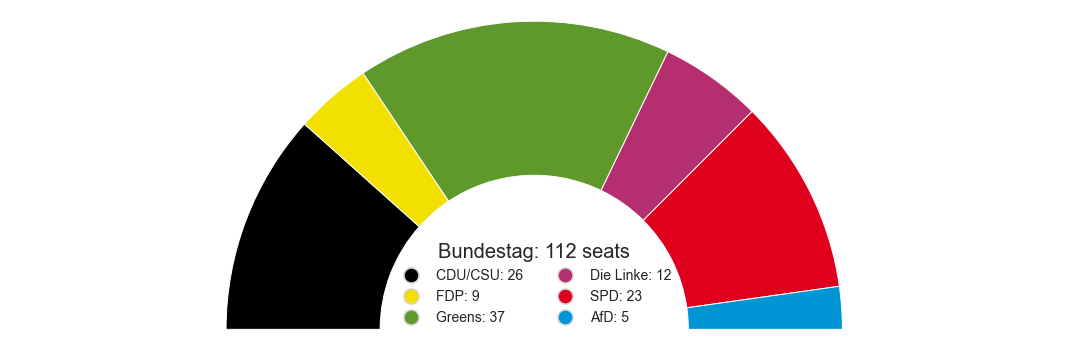

In [11]:
ax = stdviz.plot.semipie(counts=allocations,
                             colors=party_colors, 
                             donut_ratio=0.5)

handles, labels = stdviz.plot.legend.gen_elements(counts=allocations, names=parties, 
                                                  colors=party_colors, size=15, 
                                                  marker='o', padding_indexes=None,
                                                  order=None)

ax.legend(handles=handles, labels=labels,
          title='Bundestag: {} seats'.format(sum(allocations)), 
          title_fontsize=20, fontsize=14, 
          ncol=2, loc='center', bbox_to_anchor=(0.5, 0.17), 
          frameon=False, facecolor='#ffffff', framealpha=1)

plt.show()

## Pie Plot

Allows for seamless additions of factions as an outer ring that are further colored to depict coalitions.

**Note:** the factions version is a work in progress. It needs the outer ring colors to not be an even spectrum such that there is a transition that's centered at the inner ring color boundary. The lines separating the spectrum elements also need to be removed.

We'll use this to show axis plotting as well:

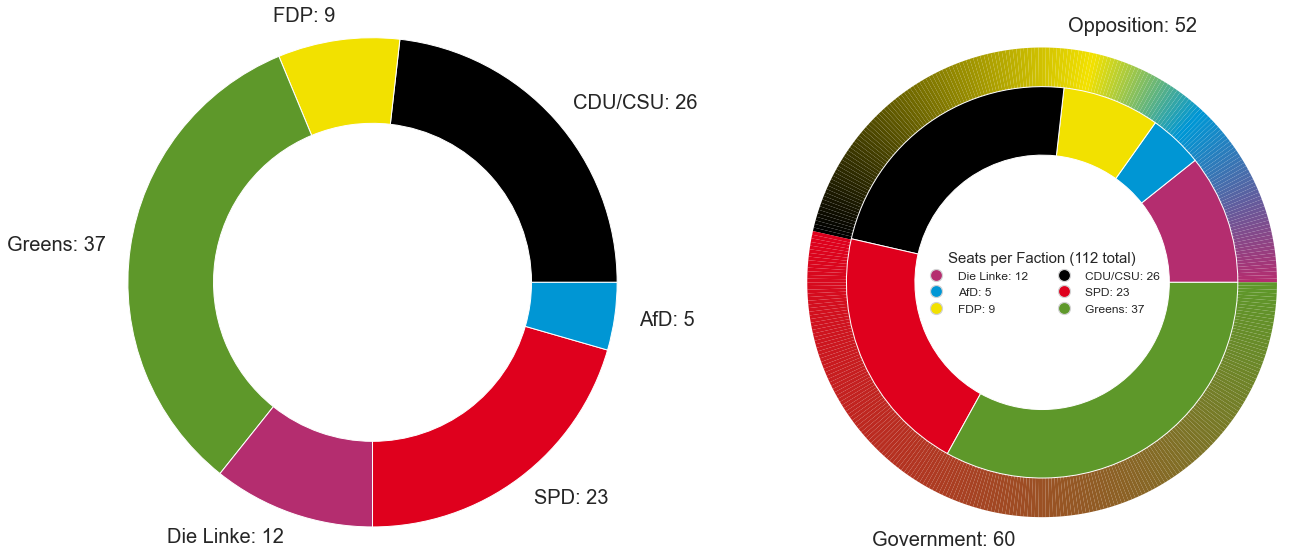

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, 
                               sharey=False, sharex=False, 
                               figsize=(22,9))

ax1 = stdviz.plot.pie(counts=allocations, names=parties, 
                         faction_names=None, 
                         colors=party_colors, radius=1.25,
                         outer_ring_density=400, donut_ratio=0.35,
                         display_names=True, display_counts=True, 
                         label_font_size=20, axis=ax1)

ax2 = stdviz.plot.pie(counts=factioned_allocations, names=parties_by_faction, 
                         faction_names=['Opposition', 'Government'], 
                         colors=colors_by_faction, radius=1,
                         outer_ring_density=400, donut_ratio=0.35,
                         display_names=True, display_counts=True, 
                         label_font_size=20, axis=ax2)

handles = stdviz.plot.legend.gen_handles(colors=colors_by_faction, size=12, marker='o')
labels = ['{}: {}'.format(parties_by_faction[i], flat_allocations[i]) for i in range(len(flat_allocations))]

ax2.legend(handles=handles, labels=labels, 
           title='Seats per Faction ({} total)'.format(sum(flat_allocations)), 
           ncol=2, loc='center', fontsize=12, 
           title_fontsize=15, frameon=False, facecolor='#ffffff', framealpha=1)

plt.show()

## Comparative Line Plot

Allows for easy comparisons of statistics across time or hypothetical situations.

We'll generate a random vote allocation based on our original seat allocations, then assign new seats given a differing amount of total seats to be allocated. Afterwards we'll see how the makeup of the Bundestag would change given a differing number of total seats:

In [13]:
votes = [2700, 900, 3300, 1300, 2150, 500]

In [14]:
seat_limits = list(range(50, 95+1, 5))
seat_limits[:5]

[50, 55, 60, 65, 70]

We'll use the Huntington-Hill method of appointment, which is the method used in the United States to allocate seats in the House of Representatives to states:

In [15]:
allocations_by_limit = pd.DataFrame()
allocations_by_limit['parties'] = parties
allocations_by_limit['votes'] = votes

for limit in seat_limits:
    allocations_by_limit.loc[:,'{}_seats'.format(limit)] = \
            pd.Series(appointment.methods.highest_average(averaging_style='Huntington-Hill',
                                                          shares=votes, 
                                                          total_alloc=limit, 
                                                          alloc_threshold=None, 
                                                          min_alloc=1, 
                                                          tie_break ='majority', 
                                                          majority_bonus=False, 
                                                          modifier=None),
                                                          index=range(len(allocations_by_limit)))

In [16]:
allocations_by_limit

,parties,votes,50_seats,55_seats,60_seats,65_seats,70_seats,75_seats,80_seats,85_seats,90_seats,95_seats
0,CDU/CSU,2700,13,13,15,16,18,19,20,21,22,24
1,FDP,900,4,5,5,5,6,6,7,7,8,8
2,Greens,3300,15,16,18,20,21,23,24,26,27,29
3,Die Linke,1300,6,7,7,8,8,9,9,10,11,11
4,SPD,2150,10,11,12,13,14,15,16,17,18,19
5,AfD,500,2,3,3,3,3,3,4,4,4,4


In [17]:
compare_cols = list(allocations_by_limit.columns.difference(['parties', 'votes']))
compare_cols[:5]

['50_seats', '55_seats', '60_seats', '65_seats', '70_seats']

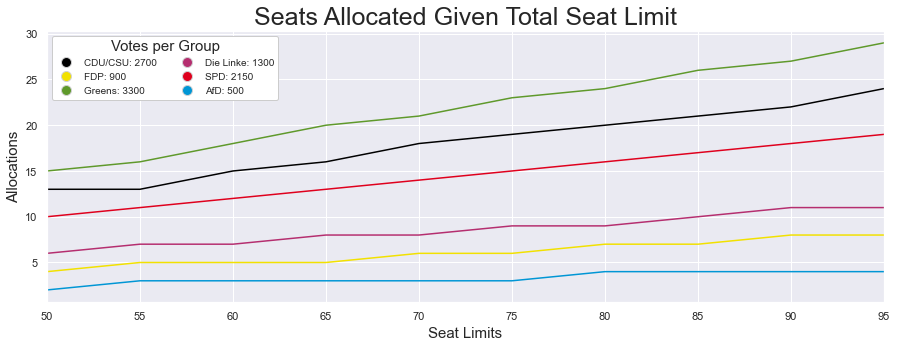

In [18]:
ax = stdviz.plot.comp_line(df=allocations_by_limit, 
                              dependent_cols=compare_cols, 
                              indep_stats=seat_limits,
                              lctn_col=None,
                              colors=party_colors, 
                              stacked=False, 
                              percent=False, 
                              axis=None)

handles = stdviz.plot.legend.gen_handles(colors=party_colors, size=10, marker='o')
labels = ['{}: {}'.format(allocations_by_limit.loc[i, 'parties'], \
                          allocations_by_limit.loc[i, 'votes']) \
                          for i in allocations_by_limit.index]

ax.legend(handles=handles, labels=labels, 
          title='Votes per Group',
          bbox_to_anchor=(0, 1),
          ncol=2, loc='upper left', fontsize=10, 
          title_fontsize=15, 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Seats Allocated Given Total Seat Limit', fontsize=25)
ax.set_xlabel('Seat Limits', fontsize=15)
ax.set_ylabel('Allocations', fontsize=15) # label based on percent_change

plt.show()

## Disproportionality Bar Plot

Graphically depicts the disproportionality between votes received and seats allocated. Bar widths in this case are the proportion of votes received, and heights are the difference or relative difference between votes and seats received.

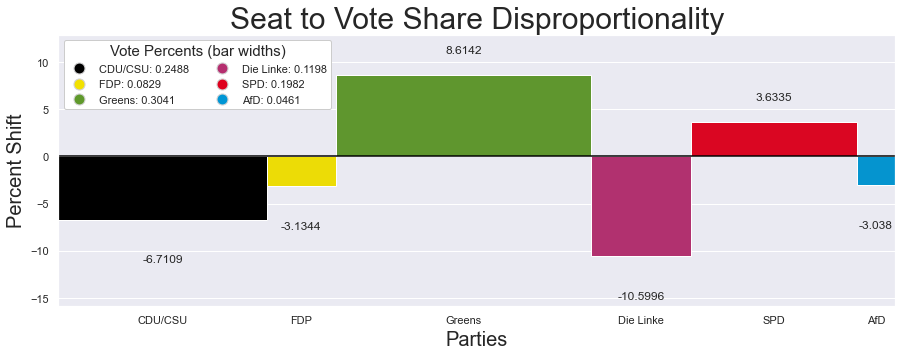

In [19]:
ax = stdviz.plot.dispr_bar(shares=votes, 
                           allocations=allocations,
                           names=parties, 
                           colors=party_colors, 
                           total_shares=None, 
                           total_alloc=None,
                           percent=True, 
                           axis=None)

handles, labels = stdviz.plot.legend.gen_elements(counts=[round(v/sum(votes), 4) for v in votes], 
                                                  names=parties, colors=party_colors, 
                                                  size=11, marker='o', padding_indexes=None,
                                                  order=None)

ax.legend(handles=handles, labels=labels,
          title='Vote Percents (bar widths)', 
          title_fontsize=15, fontsize=11, 
          ncol=2, loc='upper left', bbox_to_anchor=(0, 1), 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Seat to Vote Share Disproportionality', fontsize=30)
ax.set_xlabel('Parties', fontsize=20)
ax.set_ylabel('Percent Shift', fontsize=20)

plt.show()

Let's close with a measure of general disproportionality given the allocations and votes:

In [20]:
appointment.metrics.dispr_index(shares=votes, 
                                allocations=allocations, 
                                mertric_type='Gallagher')

0.024364384772530633

# Political Science Specific

## Parliament Plot

Leverages a dictionary allocation of matplotlib's scatter plot to color points appropriately.

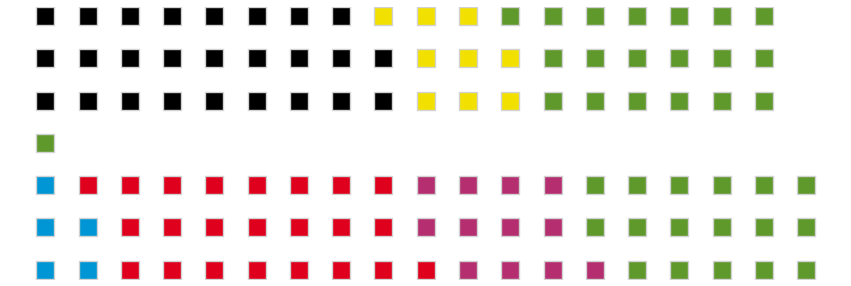

In [21]:
ax = stdviz.plot.parliament(allocations=allocations, 
                            names=parties, colors=party_colors, 
                            style='rectangle', num_rows=6, marker_size=300, 
                            speaker=True, df_seat_lctns=None, axis=None)

plt.show()

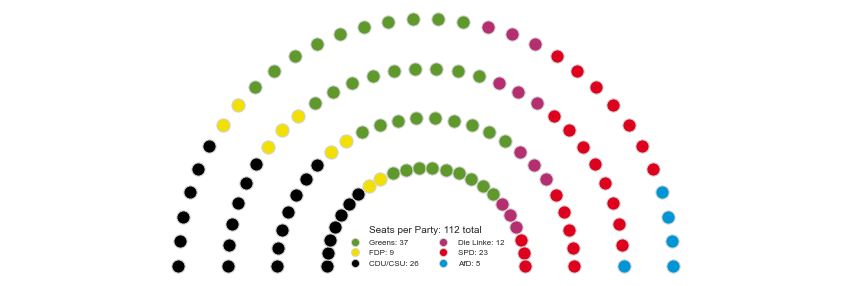

In [22]:
ax = stdviz.plot.parliament(allocations=allocations, 
                            names=parties, colors=party_colors, 
                            style='semicircle', num_rows=4, marker_size=175, 
                            df_seat_lctns=None, axis=None)

handles, labels = stdviz.plot.legend.gen_elements(counts=allocations, names=parties, colors=party_colors, 
                                                  size=8, marker='o', padding_indexes=None,
                                                  order=[2,1,0,3,4,5])

ax.legend(handles=handles, labels=labels,
          title='Seats per Party: {} total'.format(sum(allocations)), 
          title_fontsize=10, fontsize=8, 
          ncol=2, loc='center', bbox_to_anchor=(0.5, 0.12), 
          frameon=False, facecolor='#ffffff', framealpha=1)

plt.show()

We can also swap points if some are positioned incorrectly (the semicircle parl_plot is a work in progress):

In [23]:
df_seat_lctns = stdviz.utils.gen_parl_points(allocations=allocations, names=parties,
                                             style='semicircle', speaker=False, num_rows=4)
df_seat_lctns

,group,row,row_position,x_loc,y_loc
0,CDU/CSU,0,0,-2,2.44929e-16
1,CDU/CSU,0,1,-1.98137,0.272333
2,CDU/CSU,0,2,-1.92583,0.539594
3,CDU/CSU,0,3,-1.83442,0.796802
4,CDU/CSU,0,4,-1.70884,1.03917
...,...,...,...,...,...
107,SPD,3,27,4.59479,1.97178
108,AfD,3,28,4.7707,1.49682
109,AfD,3,29,4.89765,1.00649
110,AfD,3,30,4.97435,0.505842


In [24]:
# Swap two Greens and Die Linke allocations
stdviz.utils.swap_parl_allocations(df=df_seat_lctns, 
                                row_1=0, pos_1=17, 
                                row_2=3, pos_2=18)
stdviz.utils.swap_parl_allocations(df=df_seat_lctns, 
                                row_1=1, pos_1=17, 
                                row_2=2, pos_2=18)

# Swap two SPD and AfD allocations
stdviz.utils.swap_parl_allocations(df=df_seat_lctns, 
                                row_1=0, pos_1=23, 
                                row_2=3, pos_2=28)
stdviz.utils.swap_parl_allocations(df=df_seat_lctns, 
                                row_1=1, pos_1=25, 
                                row_2=3, pos_2=29)

Now pass df_seat_lctns:

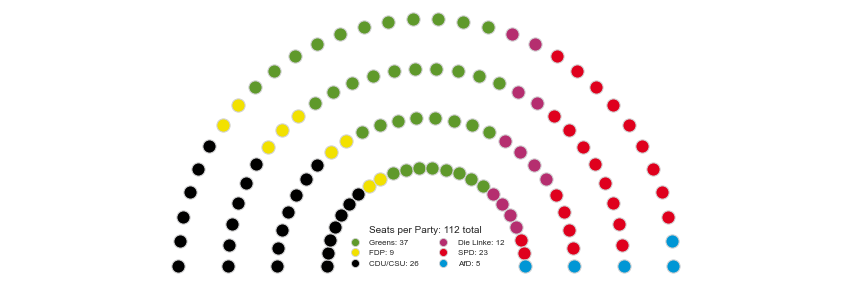

In [25]:
ax = stdviz.plot.parliament(allocations=allocations, 
                            names=parties, colors=party_colors, 
                            style='semicircle', num_rows=4, marker_size=175, 
                            df_seat_lctns=df_seat_lctns, axis=None)

handles, labels = stdviz.plot.legend.gen_elements(counts=allocations, names=parties, colors=party_colors, 
                                                  size=8, marker='o', padding_indexes=None,
                                                  order=[2,1,0,3,4,5])

ax.legend(handles=handles, labels=labels,
          title='Seats per Party: {} total'.format(sum(allocations)), 
          title_fontsize=10, fontsize=8, 
          ncol=2, loc='center', bbox_to_anchor=(0.5, 0.12), 
          frameon=False, facecolor='#ffffff', framealpha=1)

plt.show()